# <font color='blue'>MTA Latin America Analysis:  Content Syndication</font>

Channel Content Syndication Deep Dive Focuses:

- <font color='blue'>Quarterly Comparison</font>

    - 2017Q4 vs 2018Q1:  pvalue=<font color='red'>0.00045</font>
    - 2018Q1 vs 2018Q2:  pvalue=0.90455
    - 2018Q2 vs 2018Q3:  pvalue=<font color='red'>0.00001</font>
    - 2018Q3 vs 2018Q4:  pvalue=<font color='red'>0.00938</font>
    - 2017Q4 vs 2018Q4:  pvalue=<font color='red'>0.02546</font>
- <font color='blue'>Client Flag</font>
    - no significance
- <font color='blue'>Client Type</font>
    - no significance
- <font color='blue'>Journey Length</font>
    - Mexico and SSA both have significantly variant negative marketing attribution for short journey length for CS compared to other medium and long.
- <font color='blue'>Industry</font>
- <font color='blue'>Vendor</font>
- <font color='blue'>Audiences</font>

In [1]:
import requests
import os
import sys
import pandas as pd
import pandasql as ps
import numpy as np
import pyodbc
from scipy.stats import ttest_ind
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from scipy import stats
import statsmodels.api as sm
from scipy.stats import chisquare as cs
from scipy.stats import chi2_contingency

## Pipeline Lens Analysis (OPTY_BU):  Q4 2017 through Q4 2018

In [4]:
# Pipeline Lens Q4 2017 & Q4 2018

cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_p = pd.io.sql.read_sql_query(
    """ with t as (SELECT 
            CASE 
			 	WHEN YEAR(JOURNEY_END_DT)='2017' AND MONTH(JOURNEY_END_DT)=10 THEN '2017Q4'
				WHEN YEAR(JOURNEY_END_DT)='2017' AND MONTH(JOURNEY_END_DT)=11 THEN '2017Q4'
		 		WHEN YEAR(JOURNEY_END_DT)='2017' AND MONTH(JOURNEY_END_DT)=12 THEN '2017Q4'
			 	WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=1 THEN '2018Q1'
		 		WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=2 THEN '2018Q1'
		 		WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=3 THEN '2018Q1'
		 		WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=4 THEN '2018Q2'
		 		WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=5 THEN '2018Q2'
		 		WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=6 THEN '2018Q2'  
			 	WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=7 THEN '2018Q3'
		 		WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=8 THEN '2018Q3'
		 		WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=9 THEN '2018Q3'
			 	WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=10 THEN '2018Q4'
		 		WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=11 THEN '2018Q4'
				WHEN YEAR(JOURNEY_END_DT)='2018' AND MONTH(JOURNEY_END_DT)=12 THEN '2018Q4'
		 			ELSE NULL END AS Q,
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            CHANNEL,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2017-10-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
			
            GROUP BY
                Q,
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
				CHANNEL)
				
Select
	t.Q,
	t.ACTIVITY_DATA_KEY,
	t.ACTIVITY_TYPE,
	t.CHANNEL, 
	CASE WHEN t.AVG_ATTR<0 THEN 'N'
         WHEN t.AVG_ATTR>=0 THEN 'P'
         ELSE NULL 
		 END AS ATTR_FLAG,
    t.AVG_ATTR
	
	from t; """, con=cnxn)

cnxn.close()
df_p.head(5)

,Q,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,CHANNEL,ATTR_FLAG,AVG_ATTR
0,2018Q4,88271039,INTERACTION,Content Syndication,P,0.000675
1,2018Q4,100343185,INTERACTION,Content Syndication,N,-0.002778
2,2018Q4,15288932,INTERACTION,Content Syndication,P,0.000817
3,2018Q4,98152861,INTERACTION,Content Syndication,N,-0.033242
4,2018Q1,22792698,INTERACTION,Content Syndication,P,0.012804


### T-Test for Pipeline Average Marketing Attribution for Activity Type VISITS comparing Q4 2017 vs Q1 2018

In [16]:
cat1_17Q4 = df_p[df_p['Q']=='2017Q4']
cat2_18Q1 = df_p[df_p['Q']=='2018Q1']

ttest_ind(cat1_17Q4['AVG_ATTR'], cat2_18Q1['AVG_ATTR'])

Ttest_indResult(statistic=-3.5198576044952534, pvalue=0.0004476306456903244)

### Total Activities and Average Attribution for Q4 2017 & Q1 2018

In [14]:
df_p_17Q4_18Q1 = """
    
    SELECT 
        Q,
        COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_p
        WHERE Q IN ('2017Q4','2018Q1')
        
        GROUP BY Q; """

df_p_17Q4_18Q1_2 = (ps.sqldf(df_p_17Q4_18Q1, locals()))
df_p_17Q4_18Q1_2.head(5)

,Q,ACT_CT,ATTR
0,2017Q4,652,-0.002092
1,2018Q1,574,0.011803


### T-Test for Pipeline Average Marketing Attribution for Activity Type VISITS comparing Q1 2018 vs Q2 2018

In [13]:
cat1_p_18Q1 = df_p[df_p['Q']=='2018Q1']
cat2_p_18Q2 = df_p[df_p['Q']=='2018Q2']

ttest_ind(cat1_p_18Q1['AVG_ATTR'], cat2_p_18Q2['AVG_ATTR'])

Ttest_indResult(statistic=0.11994371681975534, pvalue=0.9045491492877525)

### Total Activities and Average Attribution for Q1 2018 & Q2 2018

In [15]:
df_p_18Q1_18Q2 = """
    
    SELECT 
        Q,
        COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_p
        WHERE Q IN ('2018Q1','2018Q2')
        
        GROUP BY Q; """

df_p_18Q1_18Q2_2 = (ps.sqldf(df_p_18Q1_18Q2, locals()))
df_p_18Q1_18Q2_2.head(5)

,Q,ACT_CT,ATTR
0,2018Q1,574,0.011803
1,2018Q2,553,0.011328


### T-Test for Pipeline Average Marketing Attribution for Activity Type VISITS comparing Q2 2018 vs Q3 2018

In [17]:
cat1_p_18Q2 = df_p[df_p['Q']=='2018Q2']
cat2_p_18Q3 = df_p[df_p['Q']=='2018Q3']

ttest_ind(cat1_p_18Q2['AVG_ATTR'], cat2_p_18Q3['AVG_ATTR'])

Ttest_indResult(statistic=4.478393680874994, pvalue=8.09670764171151e-06)

### Total Activities and Average Attribution for Q2 2018 & Q3 2018

In [18]:
df_p_18Q2_18Q3 = """
    
    SELECT 
        Q,
        COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_p
        WHERE Q IN ('2018Q2','2018Q3')
        
        GROUP BY Q; """

df_p_18Q2_18Q3_2 = (ps.sqldf(df_p_18Q2_18Q3, locals()))
df_p_18Q2_18Q3_2.head(5)

,Q,ACT_CT,ATTR
0,2018Q2,553,0.011328
1,2018Q3,932,-0.001562


### T-Test for Pipeline Average Marketing Attribution for Activity Type VISITS comparing Q3 2018 vs Q4 2018

In [20]:
cat1_p_18Q3 = df_p[df_p['Q']=='2018Q3']
cat2_p_18Q4 = df_p[df_p['Q']=='2018Q4']

ttest_ind(cat1_p_18Q3['AVG_ATTR'], cat2_p_18Q4['AVG_ATTR'])

Ttest_indResult(statistic=-2.6005933110745874, pvalue=0.009378098260482004)

### Total Activities and Average Attribution for Q3 2018 & Q4 2018

In [21]:
df_p_18Q3_18Q4 = """
    
    SELECT 
        Q,
        COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_p
        WHERE Q IN ('2018Q3','2018Q4')
        
        GROUP BY Q; """

df_p_18Q3_18Q4_2 = (ps.sqldf(df_p_18Q3_18Q4, locals()))
df_p_18Q3_18Q4_2.head(5)

,Q,ACT_CT,ATTR
0,2018Q3,932,-0.001562
1,2018Q4,979,0.003751


### T-Test for Pipeline Average Marketing Attribution for Activity Type VISITS comparing Q4 2017 vs Q4 2018

In [23]:
cat1_p_17Q4 = df_p[df_p['Q']=='2017Q4']
cat2_p_18Q4 = df_p[df_p['Q']=='2018Q4']

ttest_ind(cat1_p_17Q4['AVG_ATTR'], cat2_p_18Q4['AVG_ATTR'])

Ttest_indResult(statistic=-2.2363919052272467, pvalue=0.025461016628131456)

### Total Activities and Average Attribution for Q4 2017 & Q4 2018

In [24]:
df_p_17Q4_18Q4 = """
    
    SELECT 
        Q,
        COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_p
        WHERE Q IN ('2017Q4','2018Q4')
        
        GROUP BY Q; """

df_p_17Q4_18Q4_2 = (ps.sqldf(df_p_17Q4_18Q4, locals()))
df_p_17Q4_18Q4_2.head(5)

,Q,ACT_CT,ATTR
0,2017Q4,652,-0.002092
1,2018Q4,979,0.003751


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2017 and 2018 by Quarter

group1,group2,meandiff,lower,upper,reject
2017Q4,2018Q1,0.0139,0.0051,0.0227,True
2017Q4,2018Q2,0.0134,0.0046,0.0223,True
2017Q4,2018Q3,0.0005,-0.0073,0.0083,False
2017Q4,2018Q4,0.0058,-0.0019,0.0136,False
2018Q1,2018Q2,-0.0005,-0.0096,0.0087,False
2018Q1,2018Q3,-0.0134,-0.0215,-0.0052,True
2018Q1,2018Q4,-0.0081,-0.0161,-0.0,True
2018Q2,2018Q3,-0.0129,-0.0211,-0.0047,True
2018Q2,2018Q4,-0.0076,-0.0157,0.0006,False
2018Q3,2018Q4,0.0053,-0.0017,0.0123,False


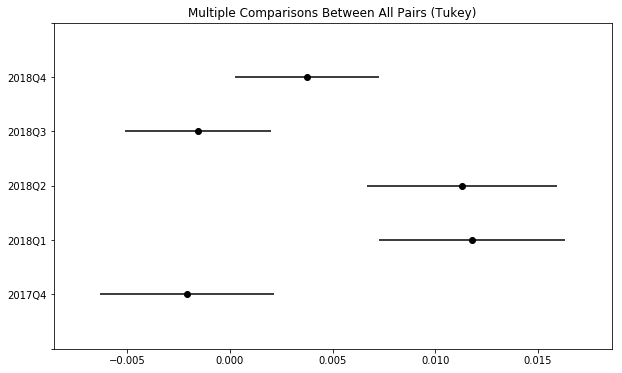

In [25]:
tukey_q = pairwise_tukeyhsd(endog=df_p['AVG_ATTR'],     # Data
                          groups=df_p['Q'],   # Groups
                          alpha=0.05)          # Significance level

tukey_q.plot_simultaneous()    # Plot group confidence intervals

tukey_q.summary()              # See test summary

## Overall Latin America Average Marketing Attribution by Journey Length in 2018 for Channel Content Syndication

In [26]:
cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_j = pd.io.sql.read_sql_query(
    """with t as (SELECT 
            ACTIVITY_DATA_KEY,
            ACTIVITY_TYPE,
            CHANNEL,
			JOURNEY_LENGTH_GROUP,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'

            GROUP BY
				ACTIVITY_DATA_KEY,
                ACTIVITY_TYPE,
				CHANNEL,
				JOURNEY_LENGTH_GROUP)

Select
	t.ACTIVITY_DATA_KEY,
	t.ACTIVITY_TYPE,
	t.CHANNEL,
	t.JOURNEY_LENGTH_GROUP,
	CASE WHEN t.AVG_ATTR<0 THEN 'N'
         WHEN t.AVG_ATTR>=0 THEN 'P'
         ELSE NULL 
		 END AS ATTR_FLAG,
    t.AVG_ATTR
	
	from t; """, con=cnxn)

cnxn.close()
df_j.head(5)

,ACTIVITY_DATA_KEY,ACTIVITY_TYPE,CHANNEL,JOURNEY_LENGTH_GROUP,ATTR_FLAG,AVG_ATTR
0,41046102,INTERACTION,Content Syndication,LONG,N,-0.001104
1,19108396,INTERACTION,Content Syndication,LONG,P,0.048425
2,97816644,INTERACTION,Content Syndication,SHORT,N,-0.005146
3,22813120,INTERACTION,Content Syndication,LONG,N,-0.000224
4,8302752,INTERACTION,Content Syndication,LONG,P,0.011745


### Tukey Test after Identifying Significance via One-Way Anova for Average Activities in 2018 by Journey Length

group1,group2,meandiff,lower,upper,reject
LONG,MEDIUM,0.006,-0.0002,0.0123,False
LONG,SHORT,-0.016,-0.0213,-0.0107,True
MEDIUM,SHORT,-0.0221,-0.0278,-0.0163,True


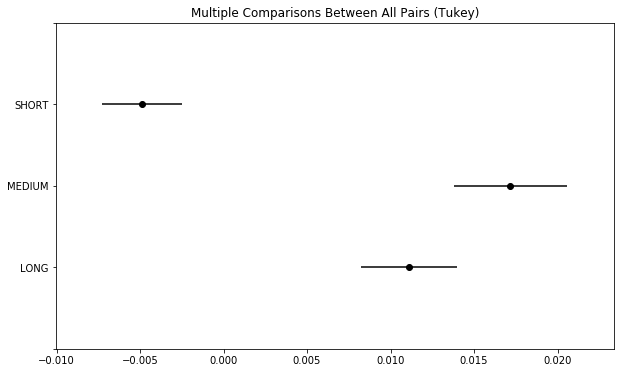

In [27]:
tukey_j = pairwise_tukeyhsd(endog=df_j['AVG_ATTR'],     # Data
                          groups=df_j['JOURNEY_LENGTH_GROUP'],   # Groups
                          alpha=0.05)          # Significance level

tukey_j.plot_simultaneous()    # Plot group confidence intervals

tukey_j.summary()              # See test summary

In [29]:
df_j_2 = """
    
    SELECT 
        JOURNEY_LENGTH_GROUP,
        COUNT(ACTIVITY_DATA_KEY) AS ACT_CT,
        AVG(AVG_ATTR) AS ATTR
       
        FROM df_j
        
        GROUP BY JOURNEY_LENGTH_GROUP; """

df_j_3 = (ps.sqldf(df_j_2, locals()))
df_j_3.head(5)

,JOURNEY_LENGTH_GROUP,ACT_CT,ATTR
0,LONG,929,0.011130
1,MEDIUM,689,0.017178
2,SHORT,1420,-0.004874


## LA Industry Analysis for CS

In [9]:
cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_i = pd.io.sql.read_sql_query(
    """with t as (SELECT 
		--CASE 
            JOURNEY_ID,
			CLIENT_FLAG,
			COUNT(DISTINCT ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
			AND INDUSTRY IS NOT NULL
            
            GROUP BY
				JOURNEY_ID,
				CLIENT_FLAG)
				
Select
	t.JOURNEY_ID,
	t.CLIENT_FLAG,
	CASE WHEN t.AVG_ATTR<0 THEN 'N'
         WHEN t.AVG_ATTR>=0 THEN 'P'
         ELSE NULL 
		 END AS ATTR_FLAG,
    AVG(t.AVG_ATTR) AS AVG_ATTR,
	AVG(t.ACT_CT) AS AVG_ACT,
	SUM(t.ACT_CT) AS SUM_ACT
	
	from t
	
	GROUP BY
		t.JOURNEY_ID,
		t.CLIENT_FLAG,
		t.AVG_ATTR;""", con=cnxn)

cnxn.close()
df_i.head(5)

,JOURNEY_ID,CLIENT_FLAG,ATTR_FLAG,AVG_ATTR,AVG_ACT,SUM_ACT
0,2868853.0,1,P,0.001229,1.0,1.0
1,2902472.0,1,P,0.000249,1.0,1.0
2,2907523.0,1,P,0.000317,1.0,1.0
3,3107816.0,1,P,0.017725,2.0,2.0
4,1759257.0,1,N,-0.011467,2.0,2.0


In [12]:
cat1_n = df_i[df_i['CLIENT_FLAG']==1]
cat2_e = df_i[df_i['CLIENT_FLAG']==0]

ttest_ind(cat1_n['AVG_ACT'], cat2_e['AVG_ACT'])

Ttest_indResult(statistic=-3.0875281582038965, pvalue=0.002043911825140609)

In [15]:
df_i_2 = """
    
    SELECT 
        CLIENT_FLAG,
        COUNT(DISTINCT JOURNEY_ID) AS JOURNEYS,
        AVG(AVG_ACT) AS AVG_ACT,
        AVG(AVG_ATTR) AS AVG_ATTR
       
        FROM df_i
        
        GROUP BY CLIENT_FLAG; """

df_i_3 = (ps.sqldf(df_i_2, locals()))
df_i_3.head(5)

,CLIENT_FLAG,JOURNEYS,AVG_ACT,AVG_ATTR
0,0,295,2.583051,0.026588
1,1,1869,1.628143,0.004180


## LA Industry Analysis for CS

In [7]:
cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_i = pd.io.sql.read_sql_query(
    """with t as (SELECT 
		--CASE 
            JOURNEY_ID,
			INDUSTRY,
			COUNT(DISTINCT ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
			AND INDUSTRY IS NOT NULL
            
            GROUP BY
				JOURNEY_ID,
				INDUSTRY)
				
Select
	t.JOURNEY_ID,
	t.INDUSTRY,
	CASE WHEN t.AVG_ATTR<0 THEN 'N'
         WHEN t.AVG_ATTR>=0 THEN 'P'
         ELSE NULL 
		 END AS ATTR_FLAG,
    AVG(t.AVG_ATTR) AS AVG_ATTR,
	AVG(t.ACT_CT) AS AVG_ACT,
	SUM(t.ACT_CT) AS SUM_ACT
	
	from t
	
	GROUP BY
		t.JOURNEY_ID,
		t.INDUSTRY,
		t.AVG_ATTR;""", con=cnxn)

cnxn.close()
df_i.head(5)

,JOURNEY_ID,INDUSTRY,ATTR_FLAG,AVG_ATTR,AVG_ACT,SUM_ACT
0,408525.0,Banking,N,-0.000183,1.0,1.0
1,1831468.0,Telecommunications,N,-0.002649,1.0,1.0
2,1954693.0,Professional Services,N,-0.044726,1.0,1.0
3,1960401.0,Energy & Utilities,N,-0.004066,1.0,1.0
4,2002965.0,Financial Markets,P,0.000714,1.0,1.0


In [7]:
cnxn = pyodbc.connect(DSN="MPW",ansi=True)
df_i = pd.io.sql.read_sql_query(
    """with t as (SELECT 
		--CASE 
            JOURNEY_ID,
			INDUSTRY,
			COUNT(DISTINCT ACTIVITY_DATA_KEY) AS ACT_CT,
            AVG(ACTIVITY_ATTR) AS AVG_ATTR
            
            FROM BACC_PRD_IDM_ACS.ACS_MKTA1.MTA_TRANSPOSED_2018 
            
            WHERE OPTY_IOT = 'Latin America'
            AND ACTIVITY_TYPE IN ('INTERACTION')
            AND OPTY_FLAG=1
            AND OPTY_BU IS NOT NULL
			AND JOURNEY_END_DT >= '2018-01-01 00:00:00'
			AND CHANNEL = 'Content Syndication'
			AND INDUSTRY IS NOT NULL
            
            GROUP BY
				JOURNEY_ID,
				INDUSTRY)
				
Select
	t.JOURNEY_ID,
	t.INDUSTRY,
	CASE WHEN t.AVG_ATTR<0 THEN 'N'
         WHEN t.AVG_ATTR>=0 THEN 'P'
         ELSE NULL 
		 END AS ATTR_FLAG,
    AVG(t.AVG_ATTR) AS AVG_ATTR,
	AVG(t.ACT_CT) AS AVG_ACT,
	SUM(t.ACT_CT) AS SUM_ACT
	
	from t
	
	GROUP BY
		t.JOURNEY_ID,
		t.INDUSTRY,
		t.AVG_ATTR;""", con=cnxn)

cnxn.close()
df_i.head(5)

,JOURNEY_ID,INDUSTRY,ATTR_FLAG,AVG_ATTR,AVG_ACT,SUM_ACT
0,408525.0,Banking,N,-0.000183,1.0,1.0
1,1831468.0,Telecommunications,N,-0.002649,1.0,1.0
2,1954693.0,Professional Services,N,-0.044726,1.0,1.0
3,1960401.0,Energy & Utilities,N,-0.004066,1.0,1.0
4,2002965.0,Financial Markets,P,0.000714,1.0,1.0


group1,group2,meandiff,lower,upper,reject
Aerospace & Defense,Automotive,0.6275,-17.3673,18.6222,False
Aerospace & Defense,Banking,0.4677,-17.3736,18.3091,False
Aerospace & Defense,Chemicals & Petroleum,0.3099,-17.6361,18.2558,False
Aerospace & Defense,Computer Services,0.5561,-17.3123,18.4246,False
Aerospace & Defense,Consumer Products,0.7297,-17.1712,18.6307,False
Aerospace & Defense,Education,1.8582,-16.0258,19.7421,False
Aerospace & Defense,Electronics,0.5484,-17.5576,18.6544,False
Aerospace & Defense,Energy & Utilities,0.25,-17.7187,18.2187,False
Aerospace & Defense,Exclusions,2.0,-17.9243,21.9243,False
Aerospace & Defense,Financial Markets,0.4314,-17.5633,18.4261,False


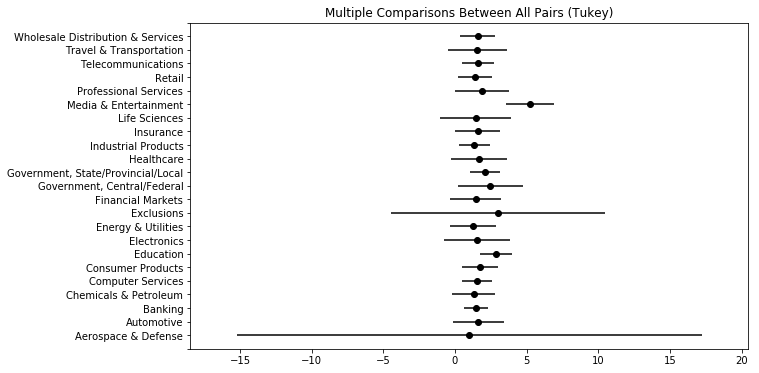

In [8]:
tukey_i = pairwise_tukeyhsd(endog=df_i['AVG_ACT'],     # Data
                          groups=df_i['INDUSTRY'],   # Groups
                          alpha=0.05)          # Significance level

tukey_i.plot_simultaneous()    # Plot group confidence intervals

tukey_i.summary()              # See test summary